In [6]:
import kornia as K
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
try:
    from videofig import videofig
except:
    !pip install videofig
    from videofig import videofig

In [2]:
# MRI Images taken from
# https://plotly.com/python/visualizing-mri-volume-slices/
vol = io.imread("https://s3.amazonaws.com/assets.datacamp.com/blog_assets/attention-mri.tif")
volume = vol.T
volume_tensor = torch.tensor([[volume]])

In [3]:
%matplotlib notebook

# Visualize Original Volume

In [38]:
def play_obj(volume):
    def redraw_fn(f, axes):
        img = volume[f]
        if not redraw_fn.initialized:
            redraw_fn.im = axes.imshow(img, animated=True)
            redraw_fn.initialized = True
        else:
            redraw_fn.im.set_array(img)
        if f == len(volume) - 1:
            plt.close()
    redraw_fn.initialized = False
    return redraw_fn
    

In [65]:
torch.manual_seed(50)
hflip = K.augmentation.RandomHorizontalFlip3D(p=1.0)
vflip = K.augmentation.RandomVerticalFlip3D(p=1.0)
dflip = K.augmentation.RandomDepthicalFlip3D(p=1.0)
aff = K.augmentation.RandomAffine3D((1, 1, 1), translate=(0.3, 0.3, 0.3), shear=0.5, scale=(1.1, 1.3))
rot = K.augmentation.RandomRotation3D((1, 1, 1))

hflip_out = hflip(volume_tensor).data[0, 0].numpy()
vflip_out = vflip(volume_tensor).data[0, 0].numpy()
dflip_out = dflip(volume_tensor).data[0, 0].numpy()
aff_out = aff(volume_tensor).data[0, 0].numpy()
rot_out = rot(volume_tensor).data[0, 0].numpy()

<IPython.core.display.Javascript object>


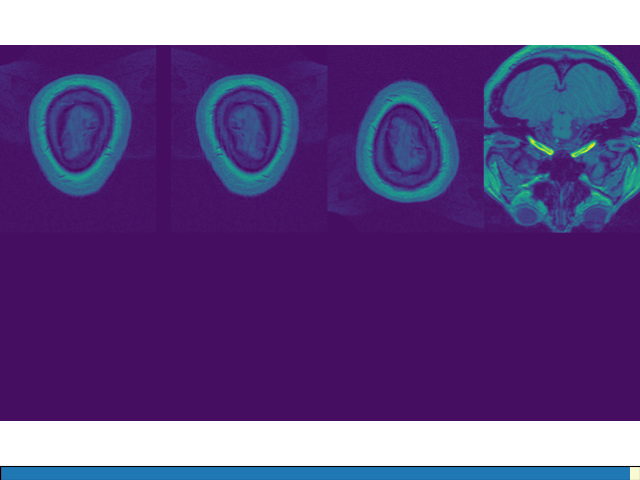

In [68]:
v = np.concatenate([volume, np.zeros((volume.shape[0], volume.shape[1], 15)), hflip_out, vflip_out, dflip_out], axis=2)
v2 = np.concatenate([
    np.zeros((volume.shape[0], volume.shape[1], volume.shape[2] + 15)),
    aff_out, rot_out, np.zeros(volume.shape)], axis=2)

videofig(len(volume), play_obj(np.concatenate([v, v2], axis=1)), play_fps=30)

# RandomVerticalFlip3D